In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
df =  sns.load_dataset('iris')
print(df.shape)
df.head()


(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
pipeline = Pipeline([
      ("feature_scaling", StandardScaler()) 
  ])

In [12]:
df = df.sample(frac=1)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor
50,7.0,3.2,4.7,1.4,versicolor
20,5.4,3.4,1.7,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
10,5.4,3.7,1.5,0.2,setosa


In [13]:
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:100]
y_train =  df[['species']][:100]
X_test =  df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][100:]
y_test =  df[['species']][100:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(100, 4) (100, 1) (50, 4) (50, 1)


In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 4) (100, 1) (50, 4) (50, 1)


In [16]:
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_train.columns)
type(X_train_scaled)

pandas.core.frame.DataFrame

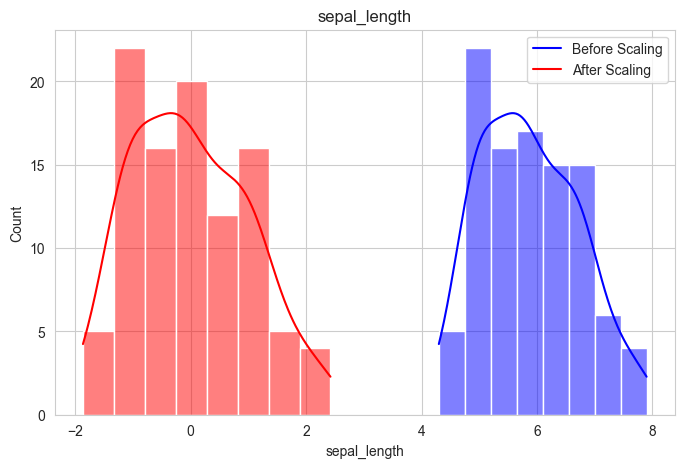

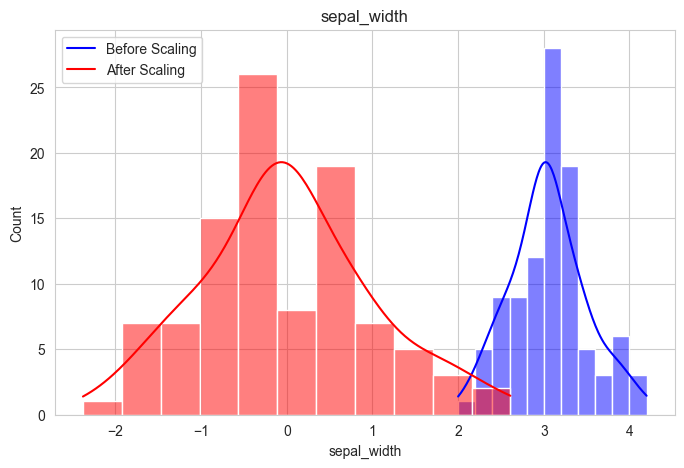

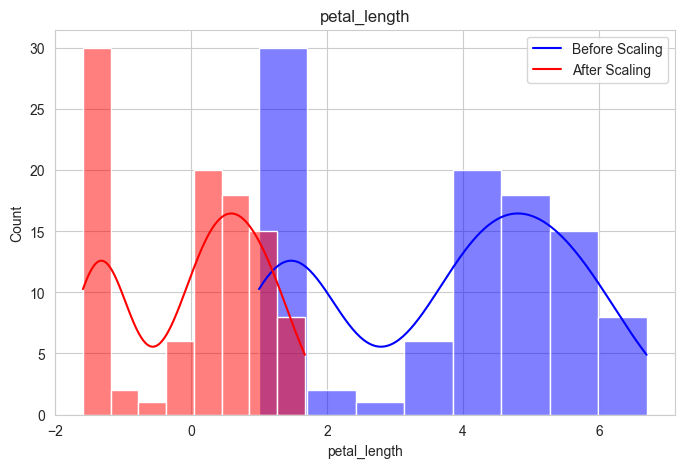

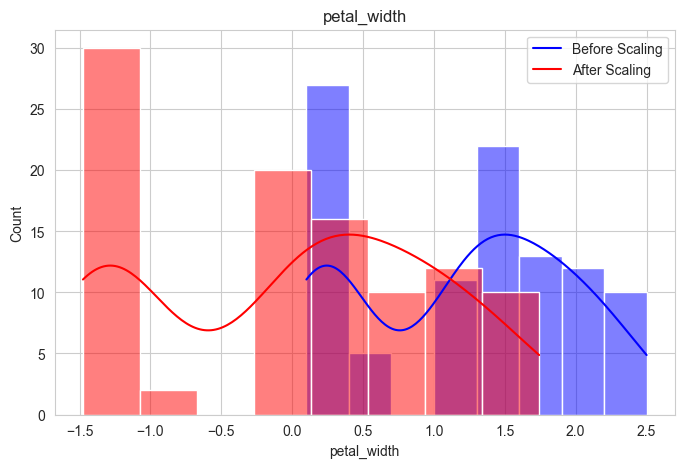

In [17]:
sns.set_style('whitegrid')
for col in X_train.columns:
  fig, axes = plt.subplots(figsize=(8,5))
  sns.histplot(data=X_train, x=col, kde=True, color='b',  ax=axes)
  sns.histplot(data=X_train_scaled, x=col, kde=True,color='r', ax=axes)
  axes.set_title(f"{col}")
  axes.legend(labels=['Before Scaling', 'After Scaling'])
  plt.show()
  print("\n\n")


In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train.head()

(100, 4) (100, 1) (50, 4) (50, 1)


,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
50,7.0,3.2,4.7,1.4
20,5.4,3.4,1.7,0.2
81,5.5,2.4,3.7,1.0
10,5.4,3.7,1.5,0.2


In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
      ( "feature_scaling", StandardScaler() ),
      ( "feature_selection", SelectFromModel(DecisionTreeClassifier(random_state=101)) ),
      ( "model", DecisionTreeClassifier(random_state=101) ),
  ])

pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [21]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [22]:
pipeline['feature_selection'].get_support()

array([False, False,  True,  True])

In [23]:
X_train.columns[pipeline['feature_selection'].get_support()] 

Index(['petal_length', 'petal_width'], dtype='object')

Topic 2

In [24]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'],axis=1),
                                                    df['species'],
                                                    test_size=0.2,
                                                    random_state=101)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (120, 4) (120,) 
* Test set: (30, 4) (30,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.predict(X_test)
model.predict_proba(X_test)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [30]:
X_live = pd.DataFrame(data={'sepal_length':6.0,
                            'sepal_width':3.9,
                            'petal_length':2.5,
                            'petal_width':0.9},
                      index=[0] # the DataFrame needs an index (either number or category), we just parsed the number 0
                      )
X_live

,sepal_length,sepal_width,petal_length,petal_width
0,6.0,3.9,2.5,0.9


In [31]:
model.predict(X_live)

array(['versicolor'], dtype=object)

In [32]:
model.predict_proba(X_live)

array([[0., 1., 0.]])

In [33]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
import joblib
joblib.dump(value=model , filename="my_first_ml_model.pkl")

['my_first_ml_model.pkl']

In [ ]:
loaded_model = joblib.load(filename="my_first_ml_model.pkl")
loaded_model

Topic 3

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.datasets import load_boston
data = load_boston()
df_reg = pd.DataFrame(data.data,columns=data.feature_names)
df_reg['price'] = pd.Series(data.target)

df_reg = df_reg.sample(frac=0.5, random_state=101)

print(df_reg.shape)
df_reg.head(3)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
